In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bitcoin  = pd.read_csv('bitcoin_price_Training - Training.csv')

In [3]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
# Checking Duplicates
bitcoin.duplicated().sum()

np.int64(0)

In [6]:
# Checking missing values
bitcoin.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
# Changing the data type of Date
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

In [8]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [9]:
bitcoin['Volume'].unique()

array(['860,575,000', '705,943,000', '803,746,000', ..., '32,505,800',
       '46,862,700', '-'], shape=(1314,), dtype=object)

In [10]:
bitcoin['Volume'].replace('-',np.nan,inplace=True)

C:\Users\fszik\AppData\Local\Temp\ipykernel_11920\3478657503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bitcoin['Volume'].replace('-',np.nan,inplace=True)


In [11]:
bitcoin.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

In [12]:
bitcoin.shape

(1556, 7)

In [13]:
bitcoin['Market Cap'].unique()

array(['45,535,800,000', '44,890,700,000', '46,246,700,000', ...,
       '1,597,780,000', '1,491,160,000', '1,500,520,000'],
      shape=(1552,), dtype=object)

In [14]:
bitcoin['Volume'] = bitcoin['Volume'].str.replace(',','').replace(np.nan,'0').astype(int)

In [15]:
bitcoin['Volume'].unique()

array([860575000, 705943000, 803746000, ...,  32505800,  46862700,
               0], shape=(1314,))

In [16]:
bitcoin['Market Cap'] = bitcoin['Market Cap'].str.replace(',','').astype(int)

In [17]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   int64         
 6   Market Cap  1556 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 85.2 KB


In [18]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000


### What was the change in the price of the stock overtime?

In [19]:
bitcoin.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,0,1500520000
1554,2013-04-29,134.44,147.49,134.00,144.54,0,1491160000
1553,2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
1552,2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
1551,2013-05-02,116.38,125.60,92.28,105.21,0,1292190000
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


In [20]:
bitcoin_copy=bitcoin.reset_index()

In [21]:
bitcoin_copy

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
...,...,...,...,...,...,...,...,...
1551,1551,2013-05-02,116.38,125.60,92.28,105.21,0,1292190000
1552,1552,2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
1553,1553,2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
1554,1554,2013-04-29,134.44,147.49,134.00,144.54,0,1491160000


In [22]:
bitcoin_copy.drop('index',axis=1,inplace=True)

In [23]:
bitcoin_copy

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,0,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,0,1491160000


In [24]:
bitcoin_copy.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

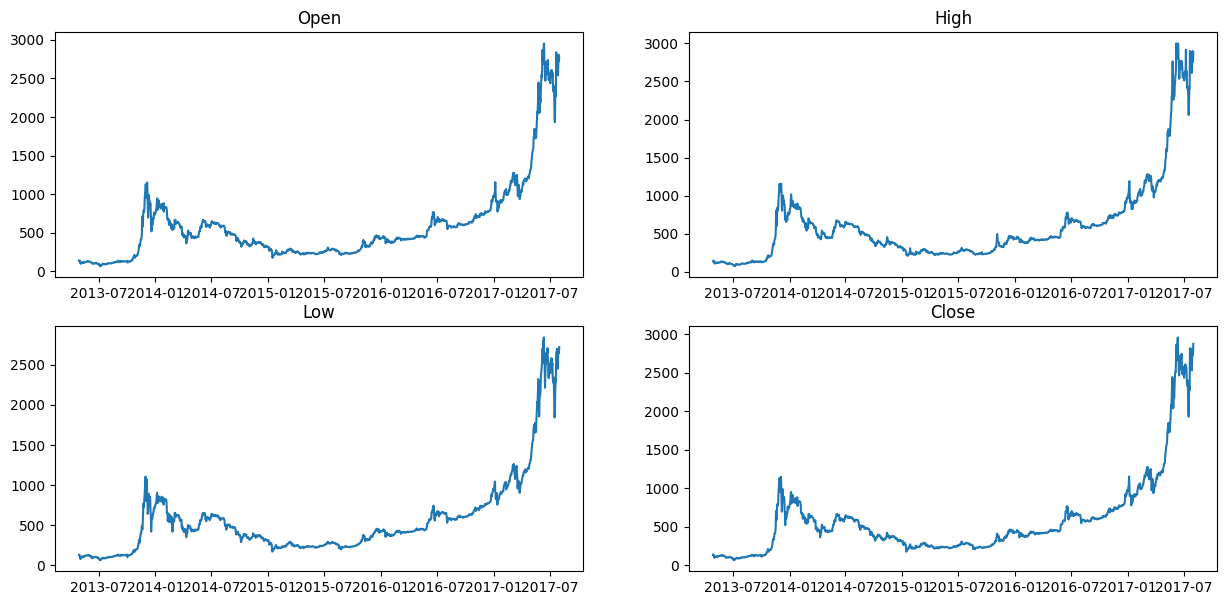

In [25]:
plt.figure(figsize=(15,7))

for index,col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(bitcoin_copy['Date'],bitcoin_copy[col])
    plt.title(col)

### Analysing open,high,low and close value of Bitcoin

Candle stick chart always shows ohlc chart ( open , high, low, close)

In [26]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [27]:
init_notebook_mode(connected=True)

In [28]:
data = bitcoin_copy[0:50]

In [29]:
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000


In [30]:
trace=go.Candlestick(x=data['Date'],
               high=data['High'],
               open=data['Open'],
               low=data['Low'],
               close=data['Close'])

In [31]:
candle_data = [trace]
layout = {
    'title':'Bitcoin Historical Data',
    'xaxis': {'title':'Date'}
}

In [32]:
fig=go.Figure(data=candle_data,layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Ananlyis closing price in more in depth

In [33]:
bitcoin_copy.shape

(1556, 7)

In [34]:
bitcoin_copy.set_index('Date',inplace=True)

Text(0.5, 1.0, 'Logarithmic Scale')

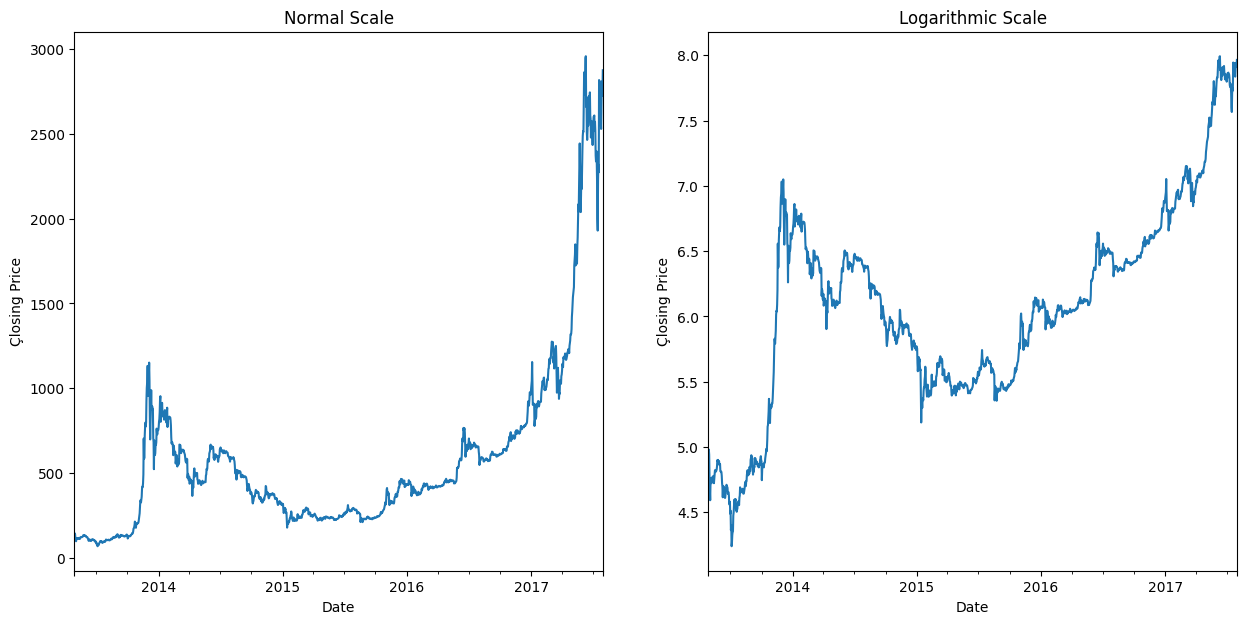

In [35]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
bitcoin_copy['Close'].plot()
plt.xlabel('Date')
plt.ylabel('Çlosing Price')
plt.title('Normal Scale')

plt.subplot(1,2,2)
np.log1p(bitcoin_copy['Close']).plot()
plt.xlabel('Date')
plt.ylabel('Çlosing Price')
plt.title('Logarithmic Scale')


No Seasonal Variations and no outliers. There is a trend of rising the price since 2016

### Analysis closing price on Yearly, Monthly and Quarterly Basis

In [36]:
bitcoin_copy.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000


<Axes: xlabel='Date'>

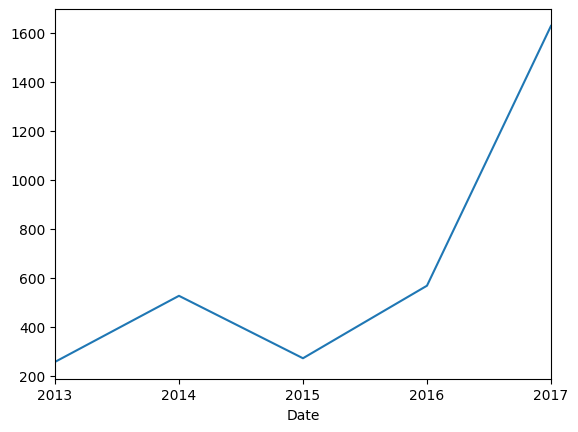

In [37]:
bitcoin_copy['Close'].resample('YE').mean().plot()

C:\Users\fszik\AppData\Local\Temp\ipykernel_11920\2244508885.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Date'>

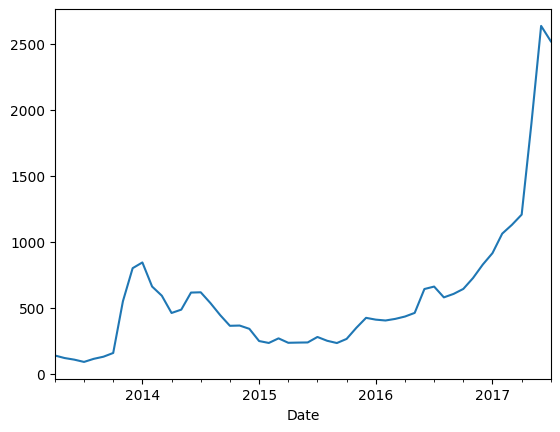

In [38]:
bitcoin_copy['Close'].resample('M').mean().plot()

C:\Users\fszik\AppData\Local\Temp\ipykernel_11920\3534411617.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



<Axes: xlabel='Date'>

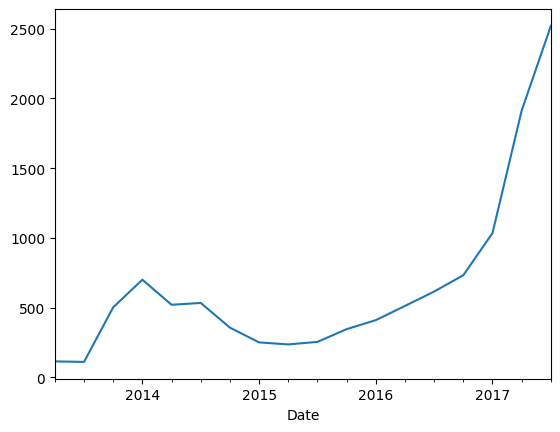

In [39]:
bitcoin_copy['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

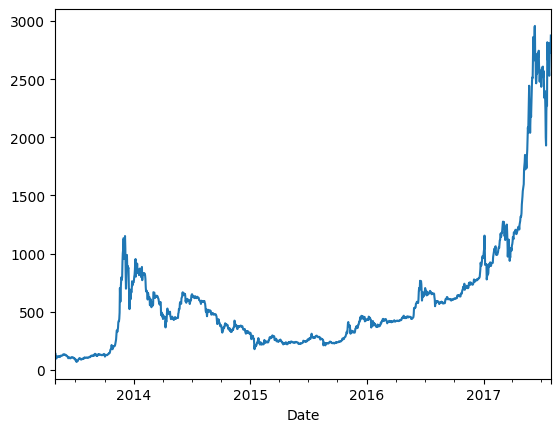

In [40]:
bitcoin_copy['Close'].resample('D').mean().plot()

### Analysing Daily Change in Closing Price

In [41]:
bitcoin_copy['Closing_price_daily_change']=bitcoin_copy['Close'].pct_change()

<Axes: xlabel='Date'>

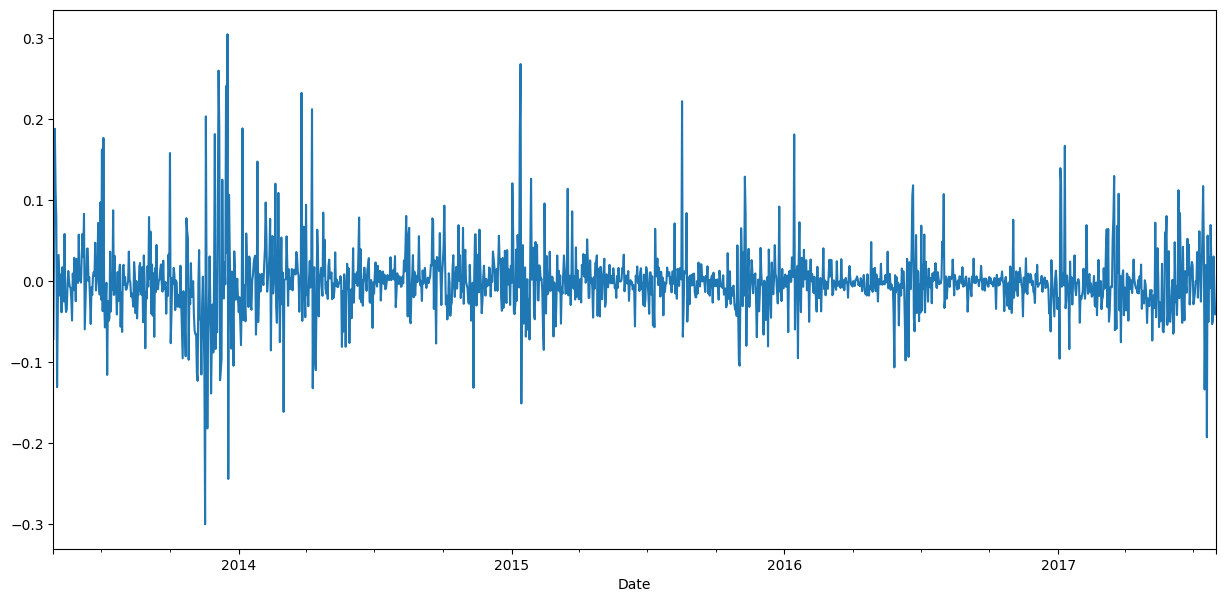

In [42]:
plt.figure(figsize=(15,7))
bitcoin_copy['Closing_price_daily_change'].plot()

In [43]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [44]:
init_notebook_mode(connected=True)